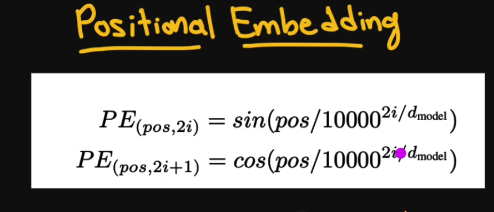

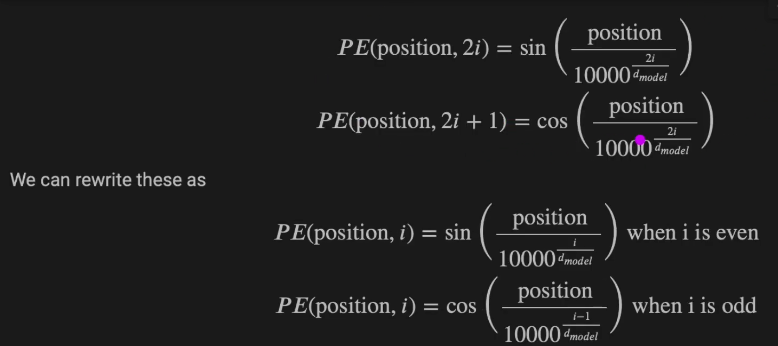

In [ ]:
# i=dimension index
# d_model=embedding length
# pos=position of word in sequence
# sin and cosine is a periodic function which means it is repeated after a certain point of time 

In [1]:
# Creating a positonal encoding 
import torch
import torch.nn as nn
max_sequence_length=10
d_model=6 # in real it is512


In [2]:
even_i=torch.arange(0,d_model,2)
even_i

tensor([0, 2, 4])

In [21]:
even_denominator=torch.pow(10000,even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [22]:
odd_i=torch.arange(0,d_model,1)
odd_i

tensor([0, 1, 2, 3, 4, 5])

In [23]:
odd_denominator=torch.pow(10000,odd_i-1/d_model)
odd_denominator

tensor([2.1544e-01, 2.1544e+03, 2.1544e+07, 2.1544e+11, 2.1544e+15, 2.1544e+19])

In [24]:
denominator=even_denominator

In [25]:
position=torch.arange(max_sequence_length,dtype=torch.float).reshape(max_sequence_length,1)

In [26]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [27]:
even_pe=torch.sin(position/denominator)
odd_pe=torch.cos(position/denominator)

In [28]:
even_pe

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [29]:
odd_pe

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [30]:
import torch
import torch.nn as nn
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length=max_sequence_length
        self.d_model=d_model
    def forward(self):
        even_i=torch.arange(0,self.d_model,2).float()
        deominator=torch.pow( 10000,even_i/self.d_model)
        position=torch.arange(self.max_sequence_length,dtype=torch.float).reshape(self.max_sequence_length,1)
        even_pe=torch.sin(position/denominator)
        odd_pe=torch.cos(position/denominator)
        stacked=torch.stack([even_pe,odd_pe],dim=2)
        Pe=torch.flatten(stacked,start_dim=1,end_dim=2)
        return Pe
        

In [31]:
pe=PositionalEncoding(d_model=6,max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

Let's walk through the `PositionalEncoding` class and its `forward` method step by step, explaining what each line does and providing example outputs for a hypothetical scenario.

### Class Initialization

The class `PositionalEncoding` is initialized with two parameters:
- `d_model`: The dimension of the model (or embedding size).
- `max_sequence_length`: The maximum length of the sequence that this encoding can handle.

```python
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
```

### Forward Method

The `forward` method computes the positional encoding matrix. Let's break down each part.

1. **Generating indices for even positions:**
    ```python
    even_i = torch.arange(0, self.d_model, 2).float()
    ```
    - `even_i` creates a tensor with values `[0, 2, 4, ..., d_model-2]`. These indices correspond to the "even" positions in the embedding dimensions.

    Example output for `d_model = 6`:
    ```python
    even_i = tensor([0., 2., 4.])
    ```

2. **Calculating the denominator:**
    ```python
    denominator = torch.pow(10000, even_i / self.d_model)
    ```
    - The denominator is a scaling factor that grows exponentially. This calculation uses the formula `10000^(2i/d_model)`, which helps in generating a range of frequencies for the sine and cosine functions.

    Example output for `d_model = 6`:
    ```python
    denominator = tensor([1.0000, 31.6228, 1000.0000])
    ```

3. **Generating positions:**
    ```python
    position = torch.arange(self.max_sequence_length, dtype=torch.float).reshape(self.max_sequence_length, 1)
    ```
    - `position` creates a column vector with values `[0, 1, 2, ..., max_sequence_length-1]`, representing each position in the sequence.

    Example output for `max_sequence_length = 4`:
    ```python
    position = tensor([[0.],
                       [1.],
                       [2.],
                       [3.]])
    ```

4. **Calculating sine and cosine for the positional encodings:**
    ```python
    even_pe = torch.sin(position / denominator)
    odd_pe = torch.cos(position / denominator)
    ```
    - These lines compute the sine and cosine for each position divided by the denominator. `even_pe` will contain sine values, and `odd_pe` will contain cosine values.

    Example output:
    ```python
    even_pe = tensor([[0.0000, 0.0000, 0.0000],
                      [0.8415, 0.0316, 0.0020],
                      [0.9093, 0.0632, 0.0040],
                      [0.1411, 0.0948, 0.0060]])

    odd_pe = tensor([[1.0000, 1.0000, 1.0000],
                     [0.5403, 0.9995, 1.0000],
                     [0.4161, 0.9980, 0.9999],
                     [0.9900, 0.9955, 0.9998]])
    ```

5. **Stacking sine and cosine values and flattening:**
    ```python
    stacked = torch.stack([even_pe, odd_pe], dim=2)
    Pe = torch.flatten(stacked, start_dim=1, end_dim=2)
    ```
    - The `stack` function combines `even_pe` and `odd_pe` along a new dimension, and `flatten` merges the last two dimensions to produce the final positional encoding matrix.

    Example output:
    ```python
    Pe = tensor([[0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000],
                 [0.8415, 0.5403, 0.0316, 0.9995, 0.0020, 1.0000],
                 [0.9093, 0.4161, 0.0632, 0.9980, 0.0040, 0.9999],
                 [0.1411, 0.9900, 0.0948, 0.9955, 0.0060, 0.9998]])
    ```

### Final Output

The final output, `Pe`, is a tensor of shape `(max_sequence_length, d_model)`. Each row corresponds to a position in the input sequence, and each column represents the positional encoding for that particular dimension in the model's embedding space.

The `stacked` tensor is created by stacking the `even_pe` (sine values) and `odd_pe` (cosine values) along a new dimension. This results in a 3D tensor where, for each position, the sine and cosine values alternate in the new dimension.

Here’s an example with `d_model = 6` and `max_sequence_length = 4`:

```python
stacked = torch.stack([even_pe, odd_pe], dim=2)
```

### Example Output for `stacked`

Given the `even_pe` and `odd_pe` tensors:

```python
even_pe = tensor([[0.0000, 0.0000, 0.0000],
                  [0.8415, 0.0316, 0.0020],
                  [0.9093, 0.0632, 0.0040],
                  [0.1411, 0.0948, 0.0060]])

odd_pe = tensor([[1.0000, 1.0000, 1.0000],
                 [0.5403, 0.9995, 1.0000],
                 [0.4161, 0.9980, 0.9999],
                 [0.9900, 0.9955, 0.9998]])
```

The `stacked` tensor will look like this:

```python
stacked = tensor([[[0.0000, 1.0000],
                   [0.0000, 1.0000],
                   [0.0000, 1.0000]],

                  [[0.8415, 0.5403],
                   [0.0316, 0.9995],
                   [0.0020, 1.0000]],

                  [[0.9093, 0.4161],
                   [0.0632, 0.9980],
                   [0.0040, 0.9999]],

                  [[0.1411, 0.9900],
                   [0.0948, 0.9955],
                   [0.0060, 0.9998]]])
```

In this 3D tensor:
- The first dimension corresponds to the sequence positions (0, 1, 2, 3).
- The second dimension corresponds to the even and odd indices of the `d_model`.
- The third dimension alternates between sine (even_pe) and cosine (odd_pe) values.

Each inner pair `[sin, cos]` provides the positional encoding for each dimension of the model's embedding.